### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [19]:
#Agregamos una columna de tienda, con el identificador de cada tienda
tienda["Tienda"]="Tienda 1"
tienda2["Tienda"]="Tienda 2"
tienda3["Tienda"]="Tienda 3"
tienda4["Tienda"]="Tienda 4"

#Unimos en un solo df para su analisis
df = pd.concat([tienda, tienda2,tienda3,tienda4], ignore_index=True)
#Se analisa la facturación por tienda
facturacion_tienda=df.groupby("Tienda")["Precio"].sum()

#Se analisa la Facturación total.
facturacion_total=df["Precio"].sum()
# se muestran los resultados


print(f"total: {facturacion_total}")


facturacion_tienda

total: 4403619200.0


,Precio
Tienda,
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


# 2. Ventas por categoría

In [26]:
#Se calcular la cantidad de productos vendidos por categoría en cada tienda. y se muestran las categorías más populares de cada tienda.
# Cantidad de productos vendidos por categoría en cada tienda
ventas_categoria_tienda = df.groupby(["Tienda", "Categoría del Producto"])["Producto"].count().reset_index()

# Se ordena dentro de cada tienda para ver las categorías más populares
ventas_categoria_tienda = ventas_categoria_tienda.sort_values(["Tienda", "Producto"], ascending=[True, False])

# Se seleccionan las categorías más populares de cada tienda
categoria_top_tienda = ventas_categoria_tienda.groupby("Tienda").head(3)
categoria_top_tienda


,Tienda,Categoría del Producto,Producto
7,Tienda 1,Muebles,465
3,Tienda 1,Electrónicos,448
5,Tienda 1,Juguetes,324
15,Tienda 2,Muebles,442
11,Tienda 2,Electrónicos,422
13,Tienda 2,Juguetes,313
23,Tienda 3,Muebles,499
19,Tienda 3,Electrónicos,451
21,Tienda 3,Juguetes,315
31,Tienda 4,Muebles,480


# 3. Calificación promedio de la tienda


In [22]:

# Calificación promedio por tienda y general
calificacion_promedio = df["Calificación"].mean()
calificacion_promedio_por_tienda = df.groupby("Tienda")["Calificación"].mean()

calificacion_promedio, calificacion_promedio_por_tienda

(np.float64(4.014520402755696),
 Tienda
 Tienda 1    3.976685
 Tienda 2    4.037304
 Tienda 3    4.048326
 Tienda 4    3.995759
 Name: Calificación, dtype: float64)

# 4. Productos más y menos vendidos

✅ Productos más vendidos:


,count
Producto,
Mesa de noche,210
Carrito de control remoto,206
Microondas,206
Batería,203
Cama king,201
Secadora de ropa,200
Modelado predictivo,200
Set de ollas,200
Cama box,199



✅ Productos menos vendidos:


,count
Producto,
Olla de presión,172
Smartwatch,172
Set de vasos,169
Sillón,168
Asistente virtual,167
Ciencia de datos con Python,166
Guitarra eléctrica,165
Mochila,163
Auriculares con micrófono,158


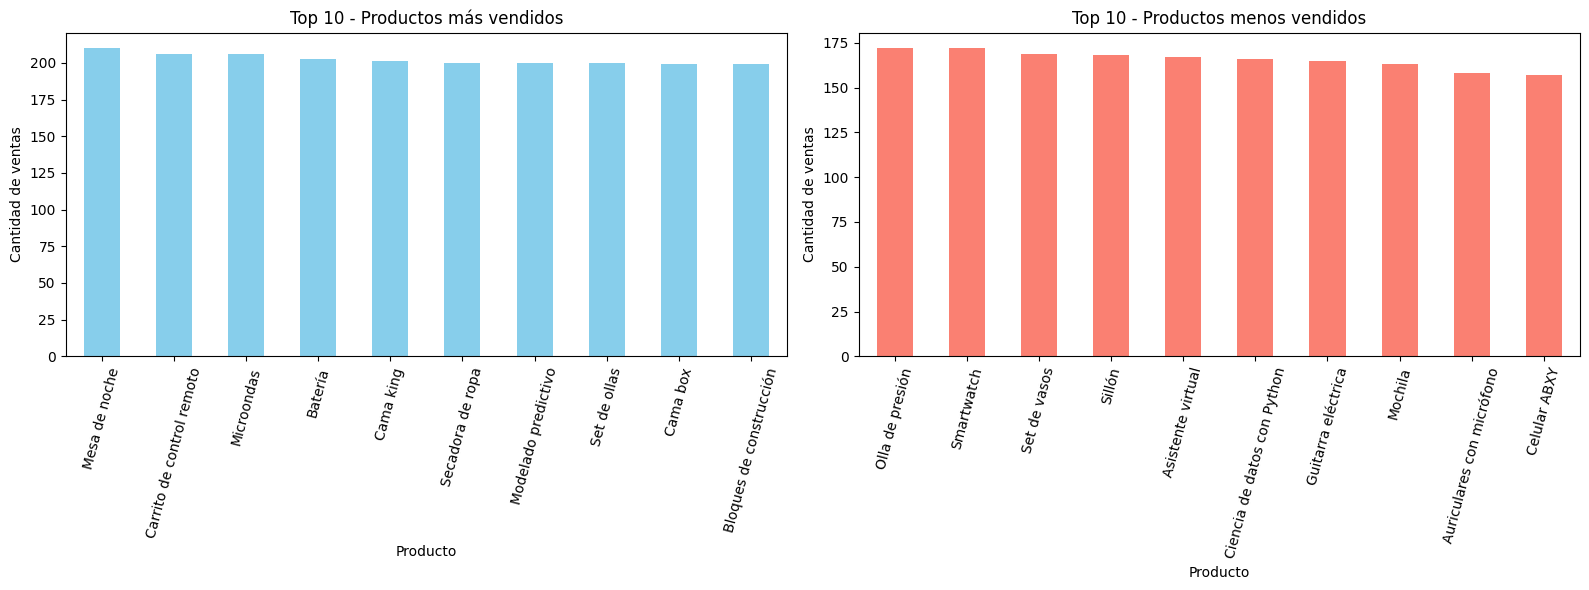

In [27]:
#Identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.
import matplotlib.pyplot as plt

# Contar cuántas veces se vendió cada producto
ventas_productos = df["Producto"].value_counts()

# Top 10 más vendidos
productos_mas_vendidos = ventas_productos.head(10)

# Top 10 menos vendidos
productos_menos_vendidos = ventas_productos.tail(10)

print("✅ Productos más vendidos:")
display(productos_mas_vendidos)

print("\n✅ Productos menos vendidos:")
display(productos_menos_vendidos)

# --------- Gráfico ---------
fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Gráfico de más vendidos
productos_mas_vendidos.plot(kind="bar", ax=ax[0], color="skyblue")
ax[0].set_title("Top 10 - Productos más vendidos")
ax[0].set_ylabel("Cantidad de ventas")
ax[0].set_xlabel("Producto")
ax[0].tick_params(axis='x', rotation=75)

# Gráfico de menos vendidos
productos_menos_vendidos.plot(kind="bar", ax=ax[1], color="salmon")
ax[1].set_title("Top 10 - Productos menos vendidos")
ax[1].set_ylabel("Cantidad de ventas")
ax[1].set_xlabel("Producto")
ax[1].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [31]:
#Se calcula el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.
# Envío promedio por tienda
envio_promedio = df.groupby("Tienda")["Costo de envío"].mean().round(2)
envio_promedio

,Costo de envío
Tienda,
Tienda 1,26018.61
Tienda 2,25216.24
Tienda 3,24805.68
Tienda 4,23459.46
